# Chapter 2. Supervised Learning

- 지도학습 : 분류 / 회귀
- 일반화(generalization) : 모델이 처음 보는 데이터에 대해 정확하게 예측할 수 있는 경우
- 과대적합 (overfitting) : 모델이 훈련 세트의 각 샘플에 너무 가깝게 맞춰져서 새로운 데이터에 일반화되기 어려울 경우
- 과소적합 (underfitting) : 모델이 간단해 훈련 데이터에도 잘 맞지 않는 경우

- 데이터의 균형을 맞추는 것이 중요함..! 얼마나 많이 모으고, 균형을 맞추느냐가 초점

In [7]:
import mglearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
X, y = mglearn.datasets.make_forge()

In [5]:
print(X)

[[  9.96346605   4.59676542]
 [ 11.0329545   -0.16816717]
 [ 11.54155807   5.21116083]
 [  8.69289001   1.54322016]
 [  8.1062269    4.28695977]
 [  8.30988863   4.80623966]
 [ 11.93027136   4.64866327]
 [  9.67284681  -0.20283165]
 [  8.34810316   5.13415623]
 [  8.67494727   4.47573059]
 [  9.17748385   5.09283177]
 [ 10.24028948   2.45544401]
 [  8.68937095   1.48709629]
 [  8.92229526  -0.63993225]
 [  9.49123469   4.33224792]
 [  9.25694192   5.13284858]
 [  7.99815287   4.8525051 ]
 [  8.18378052   1.29564214]
 [  8.7337095    2.49162431]
 [  9.32298256   5.09840649]
 [ 10.06393839   0.99078055]
 [  9.50048972  -0.26430318]
 [  8.34468785   1.63824349]
 [  9.50169345   1.93824624]
 [  9.15072323   5.49832246]
 [ 11.563957     1.3389402 ]]


In [6]:
print(y)

[1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0]


X.shape : (26, 2)


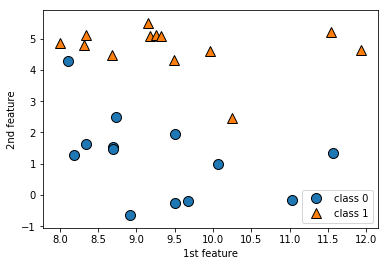

In [9]:
mglearn.discrete_scatter(X[:,0], X[:, 1], y)
plt.legend(["class 0", "class 1"], loc=4)
plt.xlabel("1st feature")
plt.ylabel("2nd feature")

print("X.shape : {}".format(X.shape))

In [11]:
?mglearn.discrete_scatter
#mglearn.discrete_scatter(x1, x2, y=None, markers=None, \
#s=10, ax=None, labels=None, padding=0.2, alpha=1, c=None, markeredgewidth=None)

# x1 : nd-array
#     input data, first axis

# x2 : nd-array
#     input data, second axis

# y : nd-array
#     input data, discrete labels

# cmap : colormap
#     Colormap to use.

# markers : list of string
#     List of markers to use, or None (which defaults to 'o').

# s : int or float
#     Size of the marker

# padding : float
#     Fraction of the dataset range to use for padding the axes.

# alpha : float
#     Alpha value for all points.

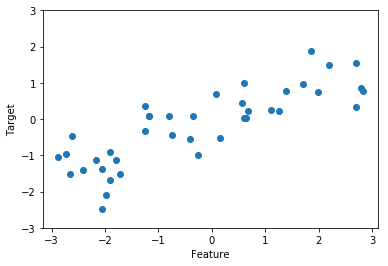

In [10]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

In [12]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): {}".format(cancer.keys()))

cancer.keys(): dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [16]:
print("Shape of cancer data: {}".format(cancer.data.shape))
print("Sample counts per class:\n{}".format(
      {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))
print("Feature names:\n{}".format(cancer.feature_names))

Shape of cancer data: (569, 30)
Sample counts per class:
{'malignant': 212, 'benign': 357}
Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [17]:
cancer.target_names

array(['malignant', 'benign'],
      dtype='<U9')

In [18]:
np.bincount(cancer.target)

array([212, 357])

In [20]:
print(cancer.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [21]:
from sklearn.datasets import load_boston
boston = load_boston()
print("Data shape: {}".format(boston.data.shape))

Data shape: (506, 13)


In [22]:
# 중복을 포함한 조합 생성
X, y = mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))

X.shape: (506, 104)


## k-nearest neigbors 

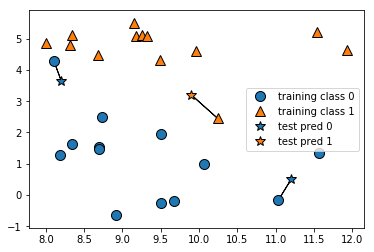

In [23]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

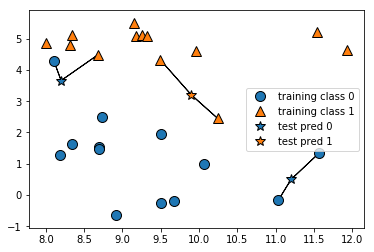

In [27]:
mglearn.plots.plot_knn_classification(n_neighbors=2)

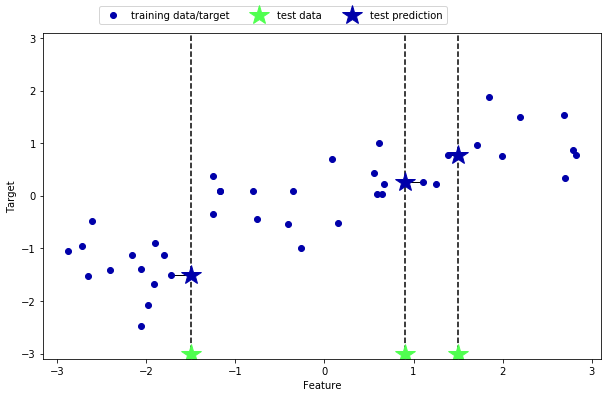

In [30]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

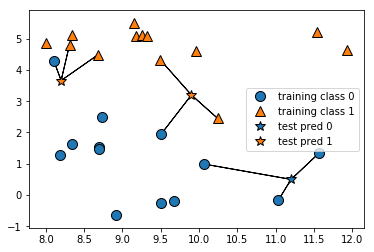

In [33]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [34]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [35]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [36]:
clf

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [37]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [38]:
print("prediciton : {}".format(clf.predict(X_test)))

prediciton : [1 0 1 0 1 0 0]


In [39]:
print("score accuracy: {:.2f}".format(clf.score(X_test, y_test)))

score accuracy: 0.86


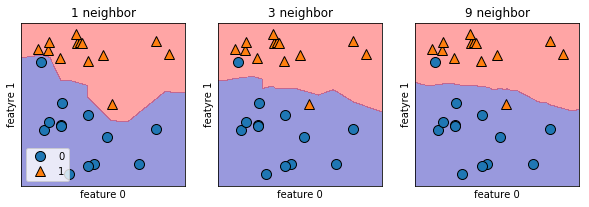

In [45]:
fig, axes = plt.subplots(1, 3, figsize=(10,3))

for n_neighbors, ax in zip([1,3,9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=0.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("featyre 1")
axes[0].legend(loc=3)

In [46]:
# 이웃의 수를 늘릴수록, decision boundary는 더 부드러워짐 ( = 더 단순한 모델이 됨 )

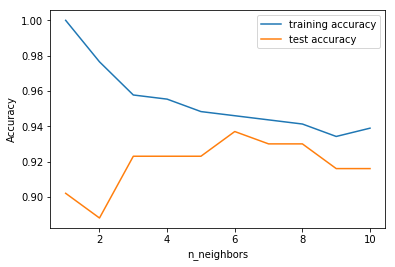

In [47]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# 1-10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

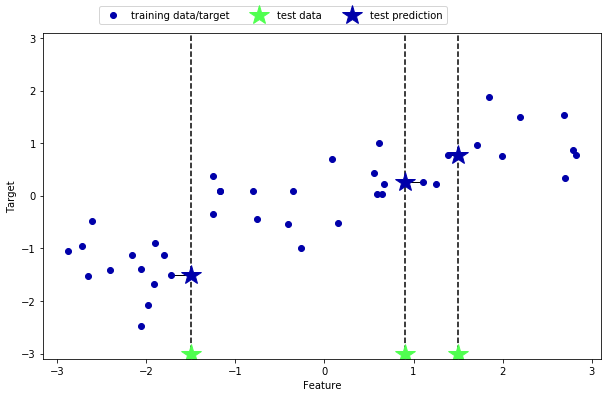

In [48]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

In [50]:
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=40)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [51]:
print("Test set predictions:\n{}".format(reg.predict(X_test)))

Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [52]:
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.83


R² = 1- ( Σ(y-ŷ)²/Σ(y-ȳ)²)

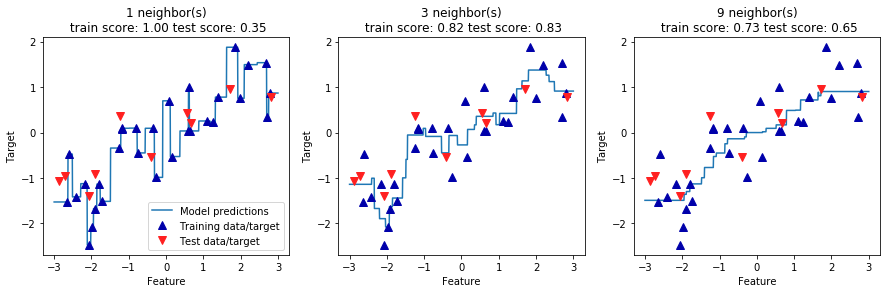

In [53]:

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
                "Test data/target"], loc="best")

In [54]:
# kneighbors 분류기는 거리를 재는 방법과 이웃의 수가 중요함!
# knn을 사용할 경우 feature들이 같은 스케일을 갖도록 정규화하는 것이 일반적임

# linear model

/usr/local/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


w[0]: 0.393906  b: -0.031804


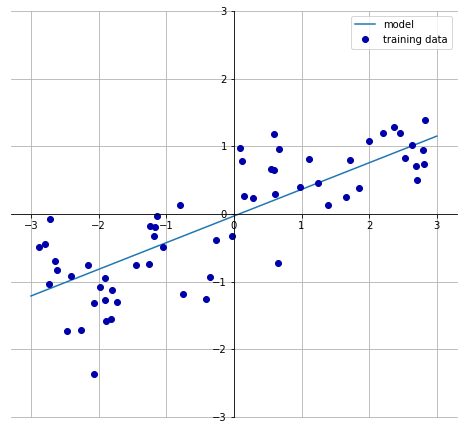

In [55]:
mglearn.plots.plot_linear_regression_wave()

- 선형 회귀는 예측과 훈련 세트에 있는 타깃 y 사이의 평균제곱오차를 최소화하는 파라미터 w, b를 찾음
- 평균제곱오차 = 예측값과 타깃값의 차이를 제곱하여 더한 후, 샘플의 개수로 나눈 것!

In [56]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [57]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [ 0.39390555]
lr.intercept_: -0.031804343026759746


In [60]:
# coef, intercept의 뒤에 _가 붙는 이유는 sklearn은 훈련 데이터에서 유도된 속성은 항상 끝에 _를 붙이기 때문! 
# ( 사용자가 지정한 매개변수와 구분하기 위해 )

In [61]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


In [62]:
# underfitting

In [63]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [64]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


In [65]:
# overfitting

# Lidge 회귀 ( regularization, 정규화 )

- 모든 특성이 출력에 주는 영향을 최소한으로 만듬
- 제곱을 패널티로 사용, 라쏘는 절대값을 패널티로 사용

[ 참고하면 좋은 글 ](https://brunch.co.kr/@itschloe1/9)

In [66]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


In [67]:
# alpha 값을 높이면 계쑤를 0에 더 가깝에 만들어 훈련 세트의 성능은 나빠지지만 일반화에는 도움이 됨

In [68]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


In [70]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


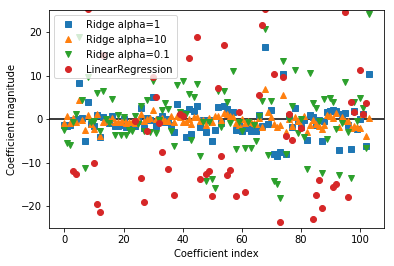

In [71]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

In [72]:
# alpha 가 0.1인 값들이 라인에 몰려있음

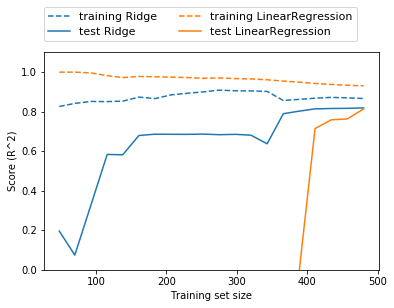

In [73]:
mglearn.plots.plot_ridge_n_samples()

# LASSO ( L1 reguralization )
- 특정 계수는 값이 0이됨

In [80]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0))) # lasso.coef_가 0이 아닌 것들을 합쳐서 개수 count

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


In [81]:
print(lasso.coef_)

[-0.          0.         -0.          0.         -0.          0.         -0.
  0.         -0.         -0.         -0.          0.         -5.3529079  -0.
  0.         -0.          0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.         -0.          0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.         -0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.          0.          0.
  0.         -0.         -0.         -0.          0.         -0.         -0.
  0.         -0.         -1.05063037 -3.3104274  -0.         -0.          0.
 -0.         -0.         -0.          0.         -0.         -0.41386744
 -0

In [82]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


In [83]:
# 그러나 alpha값을 너무 낮추면 정규화 효과가 없어져 overfitting
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.95
Test set score: 0.64
Number of features used: 94


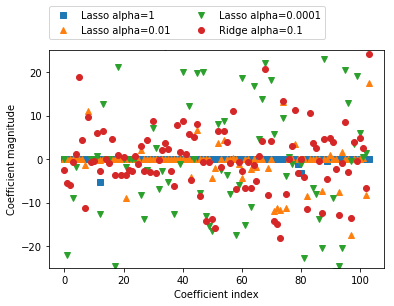

In [84]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

In [85]:
# ElasticNet : L1 + L2 같이 사용! 각각의 비율을 매개변수로 넣음

# 분류용 선형 모델
- 로지스틱 회귀 / 서포트 벡터 머신
- linear_model.LogisticRegression / svm.LinearSVC(support vector classifier)
- 로지스틱 회귀는 이진 분류에선 로지스틱 손실 함수를 사용하고 다중 분류에서는 교차 엔트로피 손실함수 사용
- LinearSVC 클래스의 기본값은 squared hinge 손실 함수 사용

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [92]:
X, y = mglearn.datasets.make_forge()

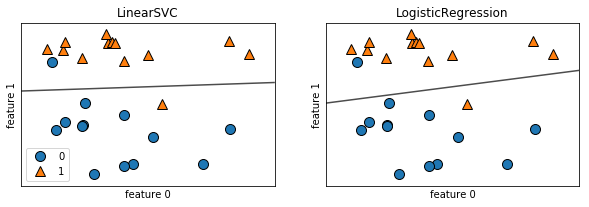

In [95]:
fig, axes = plt.subplots(1, 2, figsize=(10,3))

for model, ax, in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=0.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__)) # class 이름 소환!
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend()

### 매개변수 C( 정규화 강도를 결정하는 매개변수 ) : 높아지면 개개의 데이터 포인트를 정확히 분류하려고 노력하고, 낮아지면 데이터 포인트 중 다수에 맞추려고 함

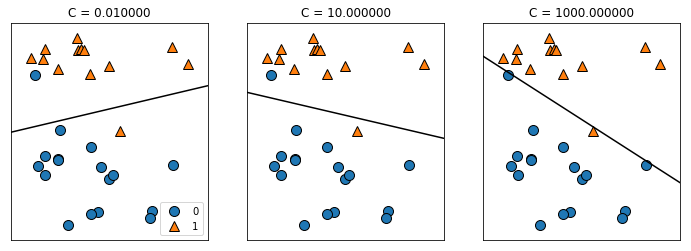

In [97]:
mglearn.plots.plot_linear_svc_regularization()

In [98]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))
# underfitting

Training set score: 0.955
Test set score: 0.958


In [101]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))
# 복잡도가 높을수록 모델이 좋아짐

Training set score: 0.967
Test set score: 0.965


In [100]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.934
Test set score: 0.930


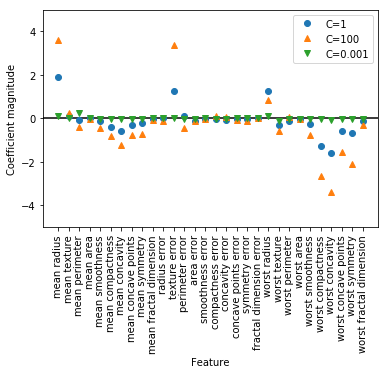

In [102]:

plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


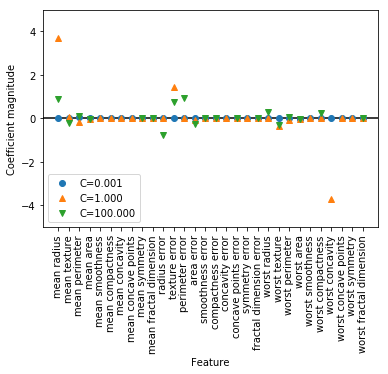

In [103]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")

plt.ylim(-5, 5)
plt.legend(loc=3)

In [105]:
xlims[0], xlims[1]

(-1.4500000000000002, 30.449999999999999)

In [106]:
plt.hlines?

# 다중 클래스 분류용 선형 모델
- 로지스틱 회귀만 제외하고, 대부분의 선형 분류 모델은 이진 분류만 지원 (다중 클래스를 지원하지 않음)
- 로지스틱 회귀는 소프트맥스 함수를 사용한 다중 클래스 분류 알고리즘을 지원함
- 대부분의 선형 분류 모델은 각 클래스를 다른 모든 클래스와 구분하도록 이진 분류 모델을 학습시킴..!

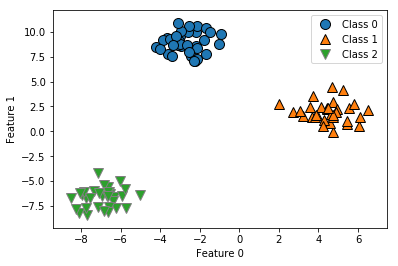

In [107]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [108]:
linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)


Coefficient shape:  (3, 2)
Intercept shape:  (3,)


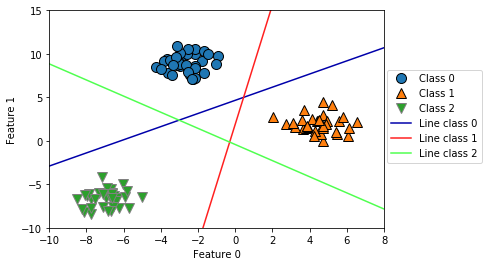

In [109]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))

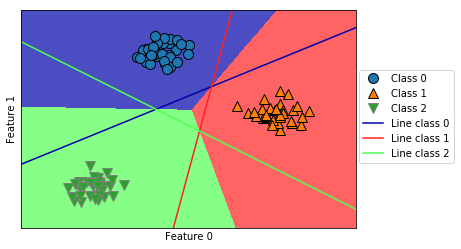

In [111]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [113]:
# 회귀 모델에서는 alpha, linearSVC와 LogisticRegression에선 C
# alpha가 클수록, C값이 작을수록 모델이 단순해짐 => Log Scale로 최적치를 정함
# L1, L2 정규화 중 어떤 것을 사용할지 결정
# 데이터가 많을 경우 solver='sag' 옵션을 주던가, SGDClassifier와 SGDRegressor를 사용..!
# 선형 모델의 경우 샘플에 비해 특성이 많을 때 잘 작동. 
# 저차원의 데이터셋은 다른 모델들의 일반화 성능이 더 좋음

## 나이브 베이즈 분류기
- 선형 모델과 매우 유사하며, 로지스틱 회귀나 서포트 벡터모델보다 빠르지만 일반화 성능이 떨어짐
- GaussianNB, BernoulliNB, MultinomialNB

In [114]:
X = np.array([[0, 1, 0, 1],
              [1, 0, 1, 1],
              [0, 0, 0, 1],
              [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

In [116]:
counts = {}
for label in np.unique(y):
    counts[label] = X[y == label].sum(axis=0)
print("Feature counts:\n{}".format(counts))

Feature counts:
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


In [117]:
np.unique(y)

array([0, 1])

In [119]:
# MultionomialNB 는 클래스별로 특서으이 평균을 계산, GaussianNB는 클래스별로 각 특성의 표준편차와 평균을 저장
# MultinomialNB와 BernoulliNB는 모델의 복잡도를 조절하는 alpha 매개변수 하나를 가지고 있음. alpha 개수만큼 추가!
# alpha 값이 성능 향상에 크게 기여하진 않지만 정확도를 높일 수 있음
# GaussianNB는 고차원인 데이터셋에 사용, 다른 두 모델은 희소한 데이터를 카운트하는데 사용

## 결정트리 ( decision tree )
- 스무 고개와 비슷

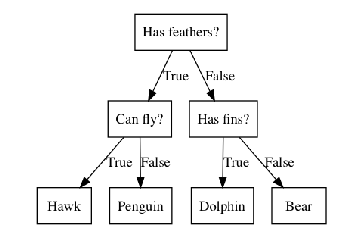

In [124]:
mglearn.plots.plot_animal_tree()
#brew install graphviz

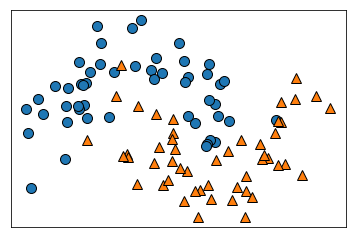

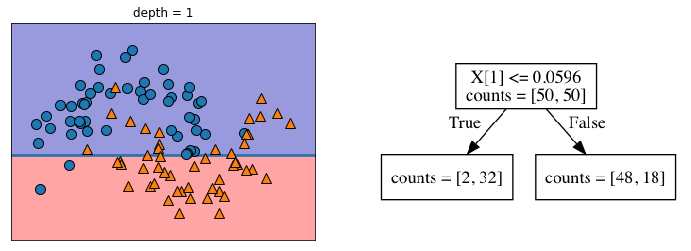

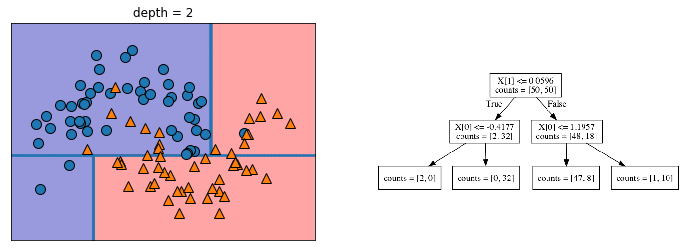

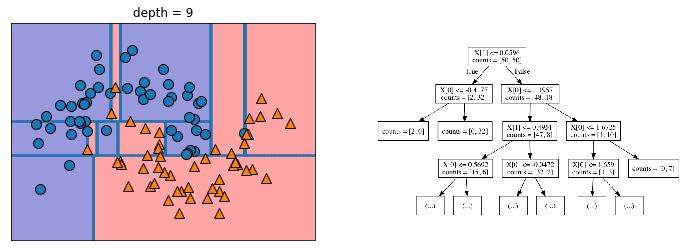

In [125]:
mglearn.plots.plot_tree_progressive()


In [130]:
# 결정트리의 오버피팅을 막는 것은 2가지
# 1. 트리 생성을 일찍 중단 ( 사전 가지치기, pre-pruning )
# 2. 데이터 포인트가 적은 노드를 삭제하거나 병합하는 전략 ( 사후 가지치기, post-pruning )
# sklearn은 사전 가지치기만 지원

In [126]:
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


In [127]:
# max_depth = 4로 지정
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))


Accuracy on training set: 0.988
Accuracy on test set: 0.951


In [128]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

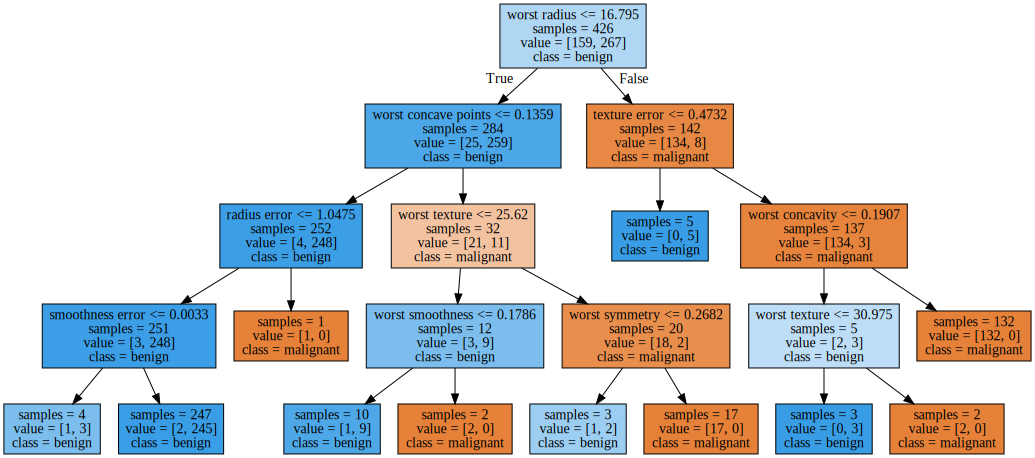

In [129]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [131]:
# 특성 중요도 ( feature importance )

In [132]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.01019737  0.04839825  0.          0.
  0.0024156   0.          0.          0.          0.          0.
  0.72682851  0.0458159   0.          0.          0.0141577   0.          0.018188
  0.1221132   0.01188548  0.        ]


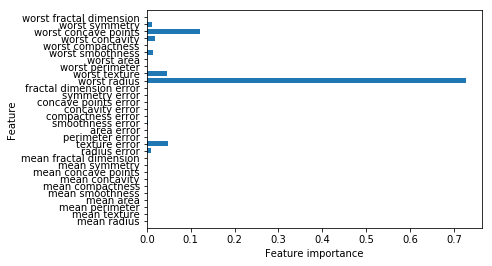

In [133]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

Feature importances: [ 0.  1.]


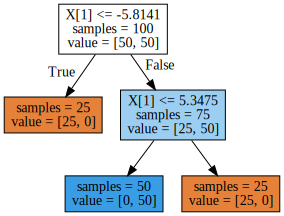

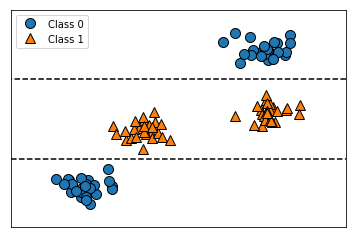

In [134]:

tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

In [135]:
# 회귀를 위한 트리 기반의 모델을 사용할 경우엔 훈련 데이터 범위 박의 포인트에 대해 예측을 할 수 없음

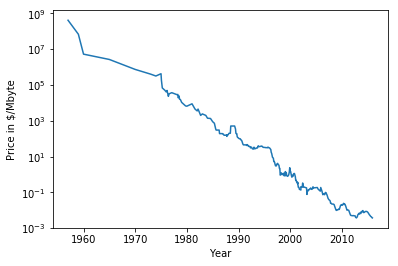

In [136]:
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")

In [138]:
from sklearn.tree import DecisionTreeRegressor

data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

X_train = data_train.date[:, np.newaxis]
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

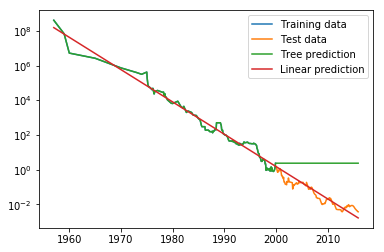

In [139]:
plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.legend()

In [140]:
# 일반화성능이 좋지 않을 경우 앙상블 방법을 사용

In [141]:
# 랜덤 포레스트와 그래디언트 부스팅